In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import string
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# Load the data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
# View the dataframe information
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
None


In [4]:
# View dataframe statistical summary
print(reviews_df.describe())

            rating     feedback
count  3150.000000  3150.000000
mean      4.463175     0.918413
std       1.068506     0.273778
min       1.000000     0.000000
25%       4.000000     1.000000
50%       5.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000


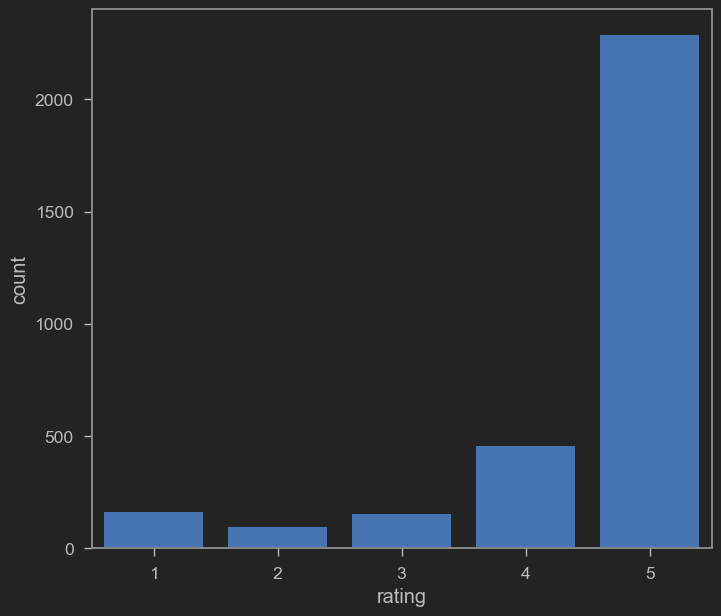

In [5]:
# Plot the count plot for the ratings
sns.countplot(x=reviews_df['rating'])
plt.show()

In [10]:
## Replace NaN with an empty string
reviews_df['verified_reviews'] = reviews_df['verified_reviews'].fillna('')

# Length of each entry of the verified_reviews column
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<Axes: ylabel='Frequency'>

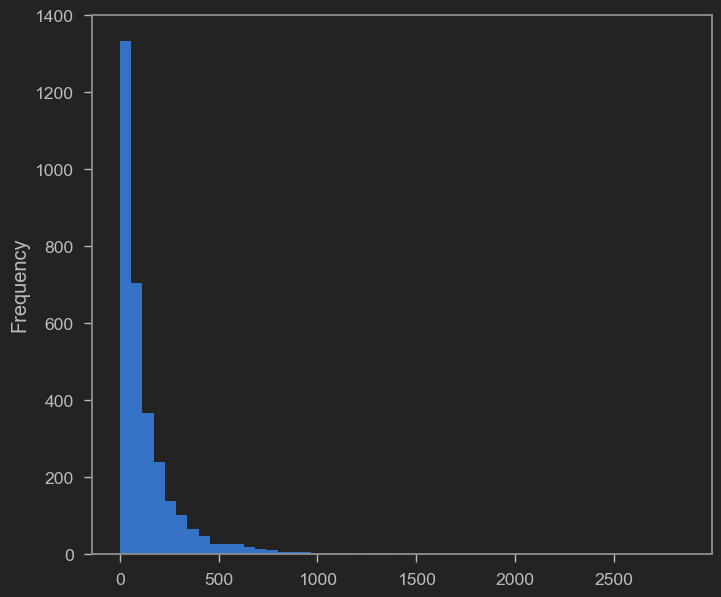

In [12]:
# Plot the histogram for the length
reviews_df['length'].plot(bins=50, kind='hist')

In [13]:
# Get statistical summary
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.048254
std,1.068506,0.273778,182.100859
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


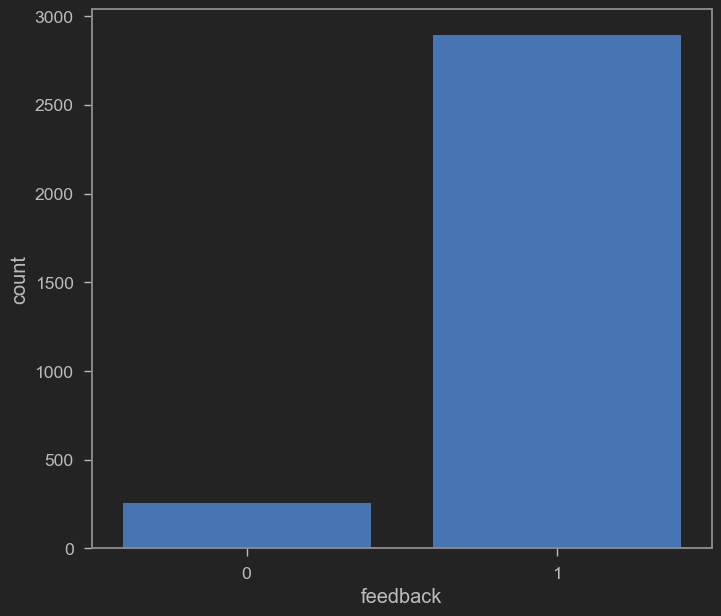

In [14]:
# Plot countplot for feedback
sns.countplot(x = reviews_df['feedback'])
plt.show()

In [25]:
# Creating the wordcloud
positive = reviews_df[reviews_df['feedback'] == 1]
positive

negative = reviews_df[reviews_df['feedback'] == 0]
negative

#sentences = positive['verified_reviews'].tolist()
#sentences
#len(sentences)

# Preparing the text data
sentences = reviews_df['verified_reviews'].tolist()
sentences_as_huge_string = ''.join(sentences)


'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

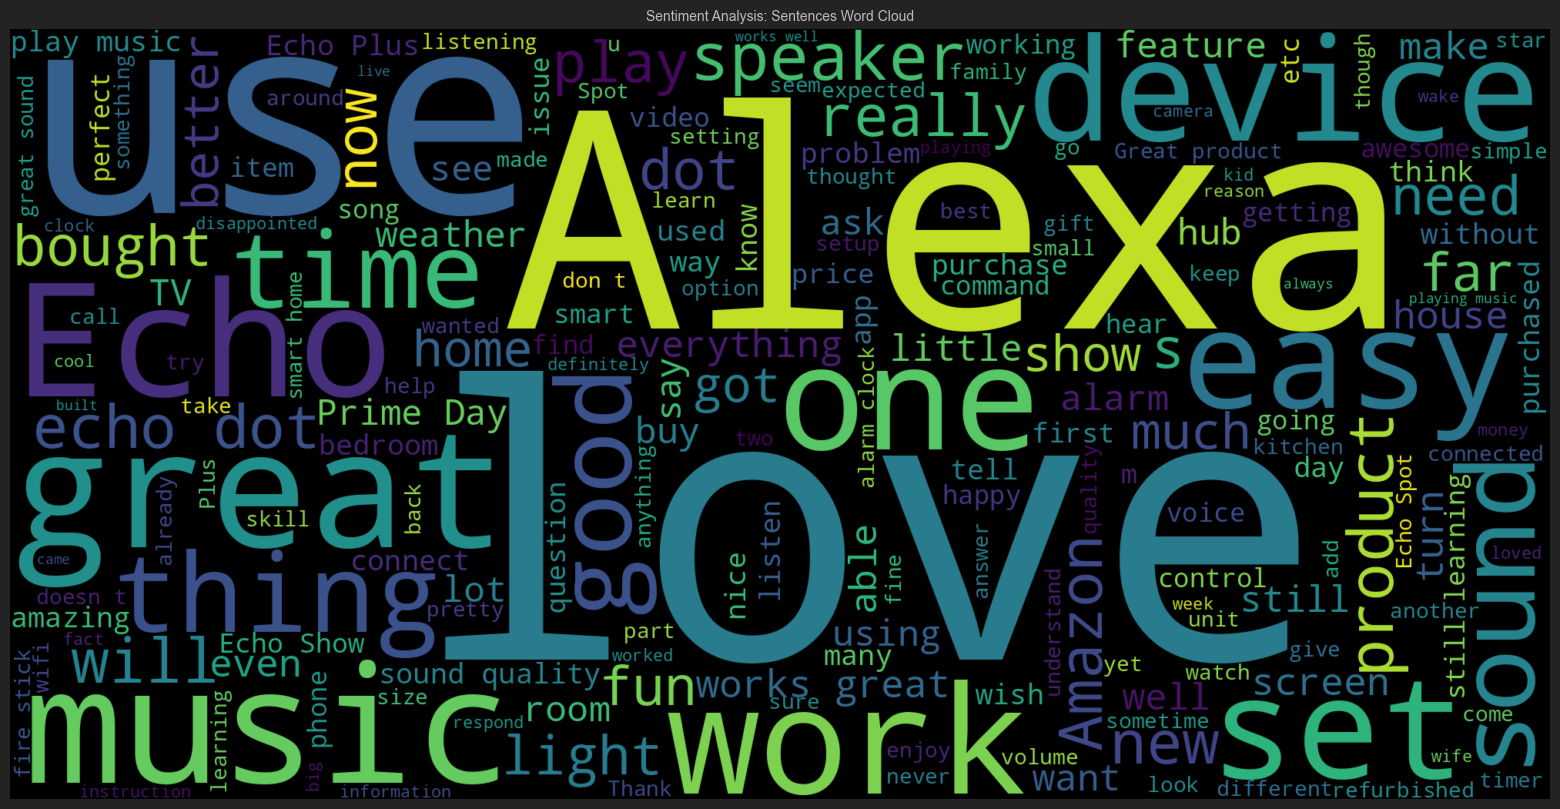

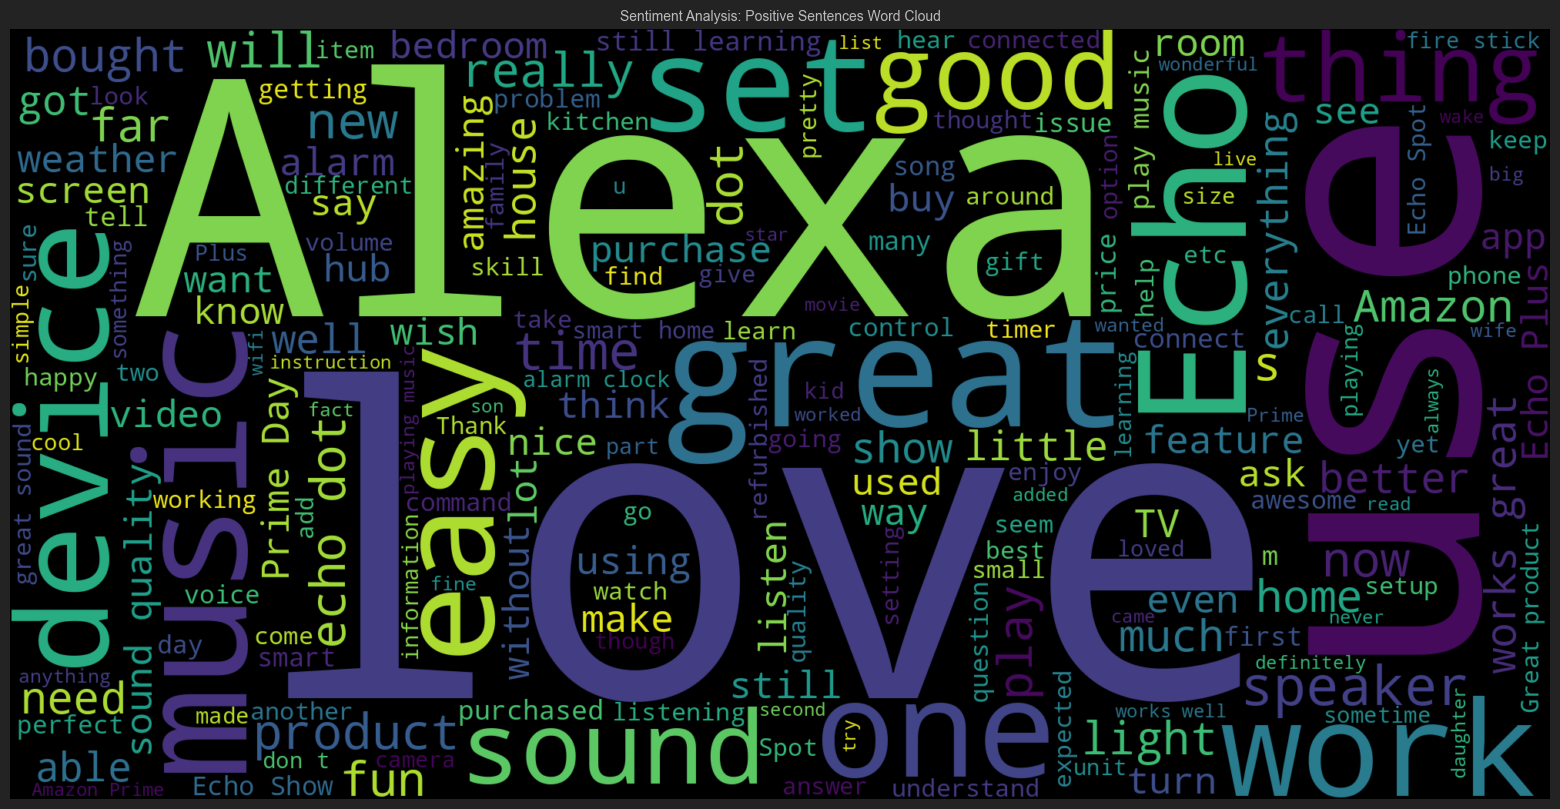

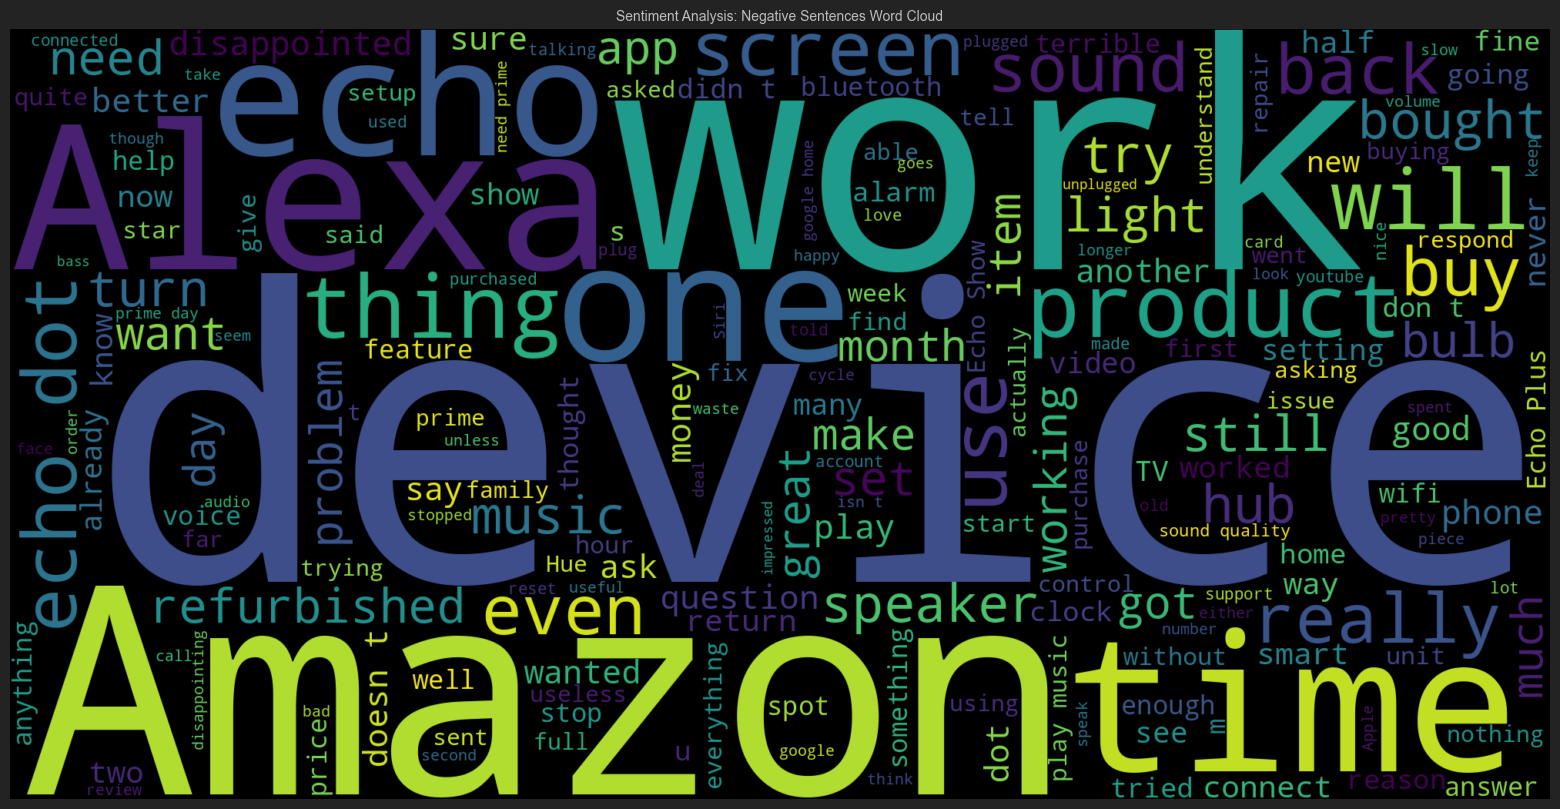

In [32]:
from wordcloud import WordCloud

wordcloud_sentences = WordCloud(width=2000, height=1000).generate(sentences_as_huge_string)
wordcloud_positive = WordCloud(width=2000, height=1000).generate(''.join(reviews_df[reviews_df['feedback'] == 1]['verified_reviews'].tolist()))
wordcloud_negative = WordCloud(width=2000, height=1000).generate(''.join(reviews_df[reviews_df['feedback'] == 0]['verified_reviews'].tolist()))

# List of worldcloud instances
wordclouds = [
    (wordcloud_sentences, 'Sentiment Analysis: Sentences Word Cloud'),
    (wordcloud_positive, 'Sentiment Analysis: Positive Sentences Word Cloud'),
    (wordcloud_negative, 'Sentiment Analysis: Negative Sentences Word Cloud')
]

# Word clouds plots
for i, (wordcloud, title) in enumerate(wordclouds):
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=10)
    plt.show(block=False)  # Non-blocking display

plt.show()  # Ensure all figures are shown

In [37]:
import string, nltk # Natural Languaje Toolkit
nltk.download('stopwords')
from nltk.corpus import stopwords

def message_cleaning(message):
    
    message_punc_cleaned = [char for char in message if char not in string.punctuation]
    message_punc_cleaned = ''.join(message_punc_cleaned)

    message_stopw_cleaned = [word for word in message_punc_cleaned.split() if word.lower() not in stopwords.words('english')]

    return message_stopw_cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/multivac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Apply the cleaning func
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)


In [57]:
# Compare
print(f'Original review: '+reviews_df['verified_reviews'][5])
print(f'Cleaned review: {reviews_df_clean.loc[:][5]}')

Original review: I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
Cleaned review: ['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
# Apply the pipeline
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])